# 数据分析实例

既然我们已经到达了本书主要章节的末尾，我们将了解许多实际数据集。对于每个数据集，我们将使用本书中介绍的技术从原始数据中提取含义。演示的技术可以应用于包括您自己在内的所有其他数据集。本章包含各种示例数据集，您可以使用本书中的工具进行练习。

示例数据集可在该书的随附GitHub存储库中找到。

## 14.1 来自Bitly的1.USA.gov数据

2011年，URL缩短服务Bitly与美国政府网站USA.gov合作，提供了从缩短了以.gov或.mil结尾的链接的用户那里收集的匿名数据的提要。在2011年，实时供稿以及每小时快照可作为可下载的文本文件提供。在撰写本文时（2017年），该服务已关闭，但我们为本书的示例保留了一个数据文件。

对于每小时快照，每个文件中的每一行都包含一种称为JSON的Web数据的通用形式，代表JSON对象表示法。例如，如果我们仅读取文件的第一行，则可能会看到类似以下内容的内容：

In [1]:
path = 'datasets/bitly_usagov/example.txt'

In [2]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

Python具有内置库和第三方库，用于将JSON字符串转换为Python字典对象。在这里，我们将使用在下载的示例文件的每一行上调用的json模块及其加载函数：

In [3]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

现在生成的对象记录是Python字典的列表：

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### 在纯Python中计算时区

假设我们有兴趣在数据集中找到最经常出现的时区（tz字段）。我们有很多方法可以做到这一点。首先，让我们再次使用列表理解来提取时区列表：

In [5]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

糟糕！事实证明并非所有记录都具有时区字段。这很容易处理，因为我们可以在列表理解的末尾添加，然后检查rec中的'tz'：

In [6]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [7]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

仅查看前10个时区，就会发现其中一些是未知的（空字符串）。您也可以将其过滤掉，但我暂时将其保留。现在，为了按时区进行计数，我将展示两种方法：较困难的方法（仅使用Python标准库）和较简单的方法（使用pandas）。一种计数方法是在遍历时区时使用字典存储计数：

In [8]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

使用Python标准库中的更高级工具，您可以更简单地编写相同的内容：

In [9]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)  # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

我将此逻辑放在函数中只是为了使其更可重用。要在时区使用它，只需传递time_zones列表：

In [10]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [11]:
len(time_zones)

3440

如果我们想要排名前10位的时区及其计数，我们可以做一些字典杂技：

In [12]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [13]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

如果您搜索Python标准库，则可能会找到collections.Counter类，这使此任务更加容易：

In [14]:
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 用pandas计算时区

从原始记录集创建DataFrame就像将记录列表传递到pandas.DataFrame一样容易：

In [15]:
import pandas as pd

frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [16]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

为框架显示的输出是摘要视图，为大型DataFrame对象显示。然后，我们可以对系列使用value_counts方法：

In [17]:
frame['tz'].value_counts()

America/New_York             1251
                              521
America/Chicago               400
America/Los_Angeles           382
America/Denver                191
                             ... 
America/Montevideo              1
America/Argentina/Mendoza       1
America/La_Paz                  1
Asia/Nicosia                    1
Australia/Queensland            1
Name: tz, Length: 97, dtype: int64

我们可以使用matplotlib可视化此数据。您可以进行一些调整以填充记录中未知和丢失的时区数据的替代值。我们用fillna方法替换缺少的值，并对空字符串使用布尔数组索引：

In [18]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

此时，我们可以使用seaborn软件包绘制水平条形图 (有关结果的可视化效果，请参见图14-1)：

In [19]:
import seaborn as sns

/Users/gaussic/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


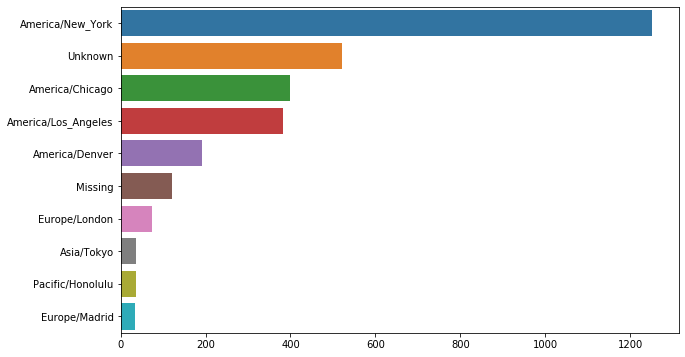

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

subset = tz_counts[:10]
plt.figure(figsize=(10,6))
sns.barplot(y=subset.index, x=subset.values)

该字段包含有关用于执行URL缩短的浏览器，设备或应用程序的信息：

In [21]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [22]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [23]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

解析这些“代理”字符串中的所有有趣信息似乎是一项艰巨的任务。一种可能的策略是拆分字符串中的第一个令牌（大致对应于浏览器功能），并对用户行为进行另一次总结：

In [24]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [25]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

现在，假设您要将最高时区分解为Windows和非Windows用户。为简单起见，假设如果字符串“ Windows”位于代理字符串中，则用户在Windows上。由于缺少某些座席，因此我们将从数据中排除这些座席：

In [26]:
cframe = frame[frame.a.notnull()]

然后，我们要计算每行是否为Windows的值：

In [27]:
import numpy as np

cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
cframe['os'][:5]

/Users/gaussic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

然后，您可以按时区列和以下新的操作系统列表对数据进行分组：

In [28]:
by_tz_os = cframe.groupby(['tz', 'os'])

类似于value_counts函数，可以使用大小来计算组计数。然后将结果重新整形为带堆栈的表：

In [29]:
agg_counts = by_tz_os.size().unstack().fillna(0)

agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


最后，让我们选择顶部时区。为此，我从agg_counts中的行数构造一个间接索引数组：

In [30]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()

In [31]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

我使用take按该顺序选择行，然后切掉最后10行（最大值）：

In [32]:
count_subset = agg_counts.take(indexer[-10:])

In [33]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


pandas有一个称为nlargest的便捷方法，它可以完成相同的操作：

In [34]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

然后，如前面的代码块所示，可以将其绘制成条形图。通过将额外的参数传递给seaborn的barplot函数，使它成为堆积的条形图（见图14-2）：

In [35]:
count_subset = count_subset.unstack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,os,tz,total
0,Not Windows,America/Sao_Paulo,13.0
1,Not Windows,Europe/Madrid,16.0
2,Not Windows,Pacific/Honolulu,0.0
3,Not Windows,Asia/Tokyo,2.0
4,Not Windows,Europe/London,43.0
5,Not Windows,America/Denver,132.0
6,Not Windows,America/Los_Angeles,130.0
7,Not Windows,America/Chicago,115.0
8,Not Windows,,245.0
9,Not Windows,America/New_York,339.0


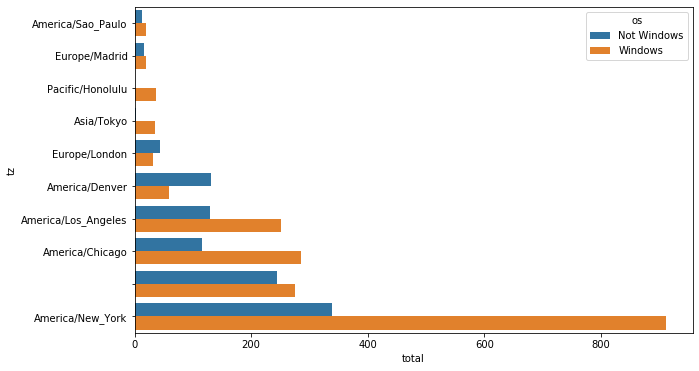

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

绘制该图并不容易看到较小组中Windows用户的相对百分比，因此我们将组百分比归一化为1：

In [37]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

In [38]:
results = count_subset.groupby('tz').apply(norm_total)

然后在图14-3中绘制：

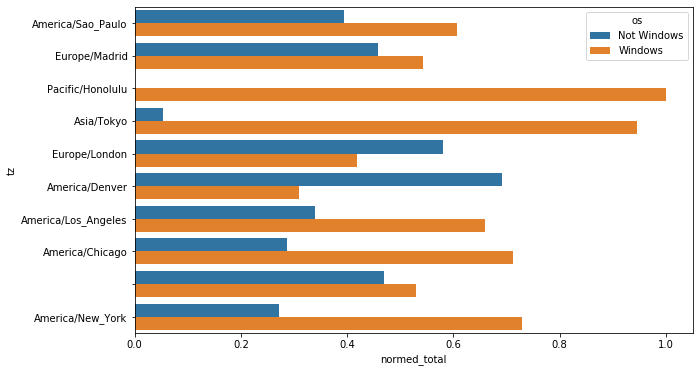

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

通过使用带groupby的变换方法，我们可以更有效地计算归一化和：

In [40]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

## 14.2 MovieLens 1M 数据集

GroupLens Research提供了1990年代末和2000年代初从MovieLens用户收集的许多电影收视率数据集合。数据提供电影等级，电影元数据（类型和年份）以及有关用户的人口统计数据（年龄，邮政编码，性别标识和职业）。在基于机器学习算法的推荐系统的开发中，此类数据通常是令人感兴趣的。虽然我们不会在本书中详细探讨机器学习技术，但我将向您展示如何将这样的数据集切成切片并将其切成所需的确切形式。

MovieLens 1M数据集包含从6,000名用户收集的4,000部电影中的100万个分级。它分布在三个表格中：评分，用户信息和电影信息。从ZIP文件中提取数据后，我们可以使用pandas.read_table将每个表加载到pandas DataFrame对象中：

In [45]:
import pandas as pd

# Make diaplay smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep='::', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep='::', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::', header=None, names=mnames)

/Users/gaussic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys
/Users/gaussic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
/Users/gaussic/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning

您可以使用Python的slice语法查看每个DataFrame的前几行，从而验证一切是否成功：

In [46]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [47]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [48]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


请注意，年龄和职业编码为整数，表示数据集的README文件中描述的组。分析分布在三个表中的数据不是一件容易的事。例如，假设您要按性别和年龄计算特定电影的平均收视率。正如您将看到的，将所有数据合并到一个表中要容易得多。 使用pandas的合并功能，我们首先与用户合并分级，然后将结果与电影数据合并。pandas根据重叠的名称推断哪些列用作合并（或联接）键：

In [50]:
data = pd.merge(pd.merge(ratings, users), movies)

In [51]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [52]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

要获得按性别分组的每部电影的平均电影收视率，我们可以使用pivot_table方法：

In [53]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [54]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


这产生了另一个DataFrame，其中包含电影标题作为行标签（“索引”）和性别作为列标签的平均收视率。首先，我筛选出至少获得250个收视率（完全是任意数字）的电影；为此，我然后按标题对数据进行分组，并使用size（）获得每个标题的一系列分组大小：

In [55]:
ratings_by_title = data.groupby('title').size()

In [56]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [68]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [69]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

然后，可以使用获得至少250个评分的标题索引来从mean_ratings中选择行：

In [70]:
# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

In [71]:
mean_ratings

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
...,...,...,...
Young Guns (1988),3.371795,3.425620,0.053825
Young Guns II (1990),2.934783,2.904025,-0.030758
Young Sherlock Holmes (1985),3.514706,3.363344,-0.151362


要在女性观众中观看顶级电影，我们可以按F列降序排列：

In [72]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [73]:
top_female_ratings

gender,F,M,diff
title,,,
"Close Shave, A (1995)",4.644444,4.473795,-0.170650
"Wrong Trousers, The (1993)",4.588235,4.478261,-0.109974
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589,-0.108060
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075,-0.178032
Schindler's List (1993),4.562602,4.491415,-0.071187
...,...,...,...
"Avengers, The (1998)",1.915254,2.017467,0.102213
Speed 2: Cruise Control (1997),1.906667,1.863014,-0.043653
Rocky V (1990),1.878788,2.132780,0.253992


### 衡量等级差异

假设您想查找在男性和女性观众之间最分裂的电影。一种方法是在mean_ratings中添加一列，其中包含均值差，然后按该值排序：

In [74]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

按“不同”排序会产生评级差异最大的电影，这样我们就可以了解哪些电影更受女性青睐：

In [75]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [76]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


颠倒顺序，再从前十行中剔除，我们得到了男人偏爱的电影，而女人却没有这么认为：

In [77]:
# Reverse order of rows, take first 10 rows
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


相反，假设您想要的电影引起了观众之间的最大分歧，而与性别认同无关。差异可以通过评分的方差或标准偏差来衡量：

In [79]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

In [80]:
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [81]:
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

您可能已经注意到，电影体裁以竖线分隔（|）字符串形式给出。如果您想按类型进行一些分析，则需要更多工作才能将类型信息转换为更实用的形式。

## 14.3 美国婴儿名称1880-2010

美国社会保障局（SSA）提供了有关1880年至今的婴儿名字发生频率的数据。Hadley Wickham是多个流行的R包的作者，经常利用此数据集来说明R中的数据操作。

我们需要进行一些数据整理来加载该数据集，但是一旦完成，我们将获得一个如下所示的DataFrame：

您可能需要对数据集做很多事情：

- 可视化随时间推移使用特定名字（您自己的名字或其他名字）的婴儿比例
- 确定名称的相对排名
- 确定每年最受欢迎的名字，或者人气上升或下降最厉害的名字
- 分析名称的趋势：元音，辅音，长度，整体多样性，拼写变化，首字母和尾字母
- 分析趋势的外部来源：圣经名称，名人，人口变化

使用本书中的工具，可以进行许多此类分析，因此，我将向您介绍其中一些。

在撰写本文时，美国社会保障局每年提供一个数据文件，其中包含每个性别/名字组合的出生总数。这些文件的原始存档可从http://www.ssa.gov/oact/babynames/limits.html 获取。

如果您在阅读本文时已移动了此页面，则很有可能通过互联网搜索再次找到该页面。下载“ National data”文件名.zip并解压缩后，您将拥有一个包含一系列文件的目录，例如yob1880.txt。我使用Unix head命令查看其中一个文件的前10行（在Windows上，您可以使用more命令或在文本编辑器中将其打开）：

In [84]:
!head -n 10 datasets/babynames/yob1880.txt

由于已经采用逗号分隔的形式，因此可以使用pandas.read_csv将其加载到DataFrame中：

In [85]:
import pandas as pd

In [86]:
names1880 = pd.read_csv('datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])

In [87]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


这些文件仅包含每年至少出现五次的名称，因此，为简单起见，我们可以将按性别划分的出生总数作为该年的出生总数：

In [88]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

由于数据集按年份分为文件，因此要做的第一件事就是将所有数据组合到单个DataFrame中，并进一步添加Year字段。您可以使用pandas.concat进行此操作：

In [90]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    
# Cincatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

这里有几件事要注意。首先，请记住，默认情况下，concat将DataFrame对象按行粘合在一起。其次，您必须传递ignore_index=True，因为我们对保留从read_csv返回的原始行号不感兴趣。因此，我们现在有了一个非常大的DataFrame，其中包含所有名称数据：

In [91]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


有了这些数据，我们就可以开始使用groupby或pivot_table在年份和性别级别汇总数据了（见图14-4）：

In [93]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [94]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


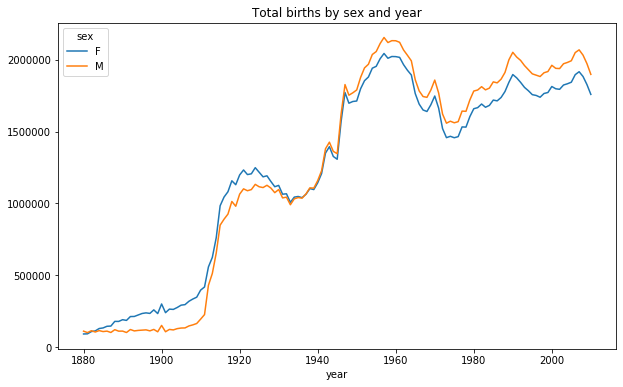

In [95]:
total_births.plot(title='Total births by sex and year', figsize=(10,6))

接下来，我们插入一个列 prop，其中给定每个名字的婴儿比例相对于总出生人数。如果prop值为0.02，则表示每100个婴儿中有2个具有特定的名称。因此，我们将数据按年份和性别分组，然后将新列添加到每个组：

In [96]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

现在，生成的完整数据集具有以下列：

In [97]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


当执行这样的分组操作时，进行健全性检查通常很有价值，例如验证在所有分组中prop列的总和为1：

In [98]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

既然完成了，我将提取数据的一部分以方便进一步分析：每种性别/年份组合的前1000个名字。这是另一组操作：

In [99]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

现在生成的数据集要小得多：

In [100]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


在接下来的数据调查中，我们将使用前1000个数据集。

### 分析名称趋势

有了完整的数据集和前1,000个数据集，我们就可以开始分析各种感兴趣的命名趋势。首先很容易将前1000个名字分为男孩和女孩两个部分：

In [101]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

可以绘制简单的时间序列，例如每年的Johns或Marys数量，但需要一些调整才能更有用。让我们形成一个按年龄和姓名分列的出生总数的数据透视表：

In [102]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

现在，可以使用DataFrame的plot方法绘制一些名称（图14-5显示了结果）：

In [103]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [104]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6abd9a4d0>,
      dtype=object)

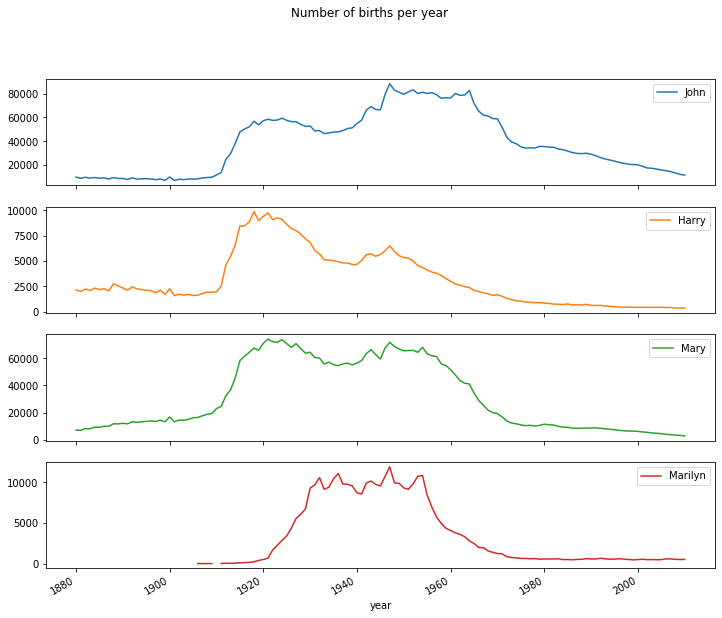

In [107]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='Number of births per year')

综观这一点，您可能会得出结论，这些名字已经不再受到美国人的青睐。但是这个故事实际上比这更复杂，这将在下一部分中进行探讨。

#### 衡量命名多样性的增长

绘图中减少的一种解释是，越来越少的父母为孩子选择共同的名字。可以在数据中探索和证实这一假设。一种衡量方法是用前1000个最受欢迎的名字表示的出生比例，我按照年龄和性别对其进行汇总和绘图（图14-6显示了所得绘图）：

In [110]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

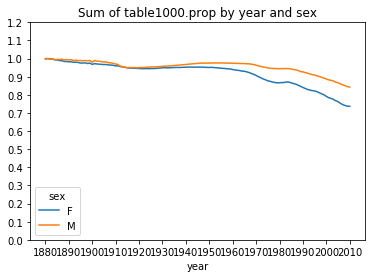

In [111]:
table.plot(title='Sum of table1000.prop by year and sex', 
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

您可以看到，实际上，名称多样性似乎正在增加（前1000名中总比例的下降）。另一个有趣的指标是，在出生率最高的50％的人群中，按照姓氏从高到低的顺序排列不同的名字 这个数字计算起来有些棘手。让我们考虑一下2010年的男孩名字：

In [112]:
df = boys[boys.year == 2010]

In [113]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


在按降序对道具进行排序之后，我们想知道要达到50％，需要多少个最受欢迎的名字。您可以编写一个for循环来执行此操作，但是矢量化NumPy方式会更聪明。取prop的累积总和，然后调用searchsorted方法，返回累积总和中需要插入0.5的位置以保持其排序顺序：

In [114]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [115]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [116]:
prop_cumsum.values.searchsorted(0.5)

116

由于数组的索引为零，因此将结果加1可获得117的结果。相比之下，在1900年，这个数字要小得多：

In [117]:
df = boys[boys.year == 1900]

In [118]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [119]:
in1900.values.searchsorted(0.5) + 1

25

现在，您可以将此操作应用于每个年份/性别组合，对这些字段进行分组，并应用一个函数来返回每个组的计数：

In [122]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

现在，由此产生的DataFrame多样性具有两个时间序列，每个性别一个，按年份索引。可以在IPython中对其进行检查，并像以前一样进行绘制（见图14-7）：

In [124]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


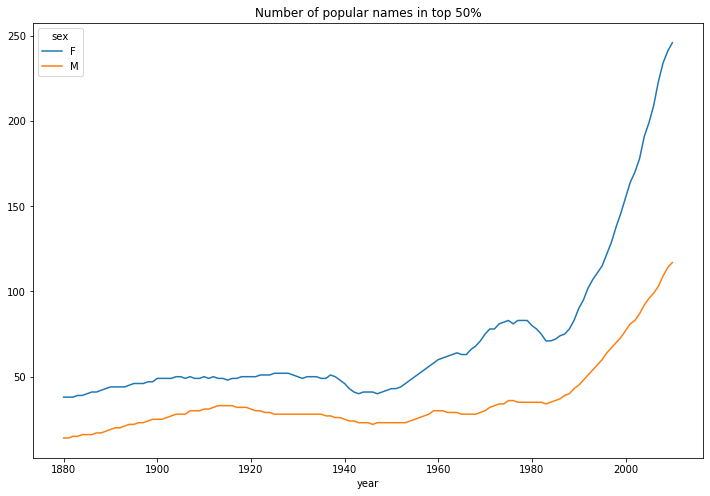

In [125]:
diversity.plot(title='Number of popular names in top 50%', figsize=(12, 8))

如您所见，女孩的名字总是比男孩的名字更加多样化，并且随着时间的流逝，它们变得越来越多。进一步的分析究竟是什么驱动多样性的发展，如替代拼写的增加，留给读者。

#### 最后一个字母革命

2007年，婴儿名字研究者劳拉·瓦滕伯格（Laura Wattenberg）在她的网站上指出，在过去的100年中，按姓氏开头的男孩名字的分布已发生了巨大变化。为了看到这一点，我们首先按年，性别和最后一个字母汇总完整数据集中的所有出生：

In [127]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

然后，我们选择跨越历史的三个代表性年份，并打印前几行：

In [128]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [129]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

接下来，按总出生数对表格进行归一化，以计算出一个新表格，其中包含以每个字母结尾的每种性别的总出生比例：

In [130]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [131]:
letter_prop = subtable / subtable.sum()

In [132]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

现在有了字母比例，我们可以按年份细分每种性别的条形图（见图14-8）：

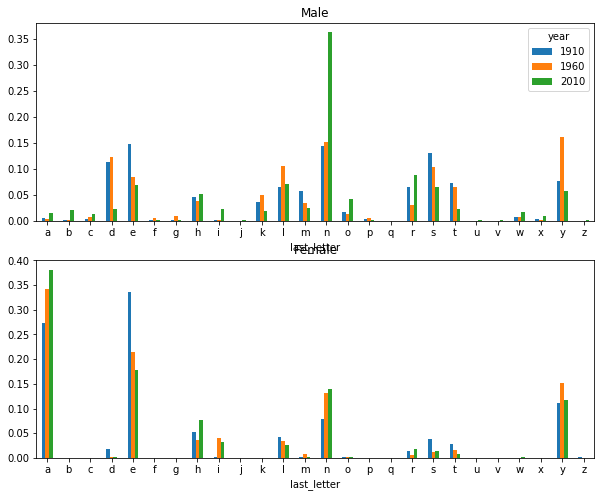

In [133]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

如您所见，以n结尾的男孩名字自1960年代以来经历了显着增长。回到之前创建的完整表格，我再次按年份和性别进行归一化，并为男孩的名字选择字母的子集，最后进行转置以使每个列成为一个时间序列：

In [134]:
letter_prop = table / table.sum()

In [135]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [136]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


有了这个时间序列的DataFrame，我可以使用其plot方法再次绘制随时间的趋势图（见图14-9）：

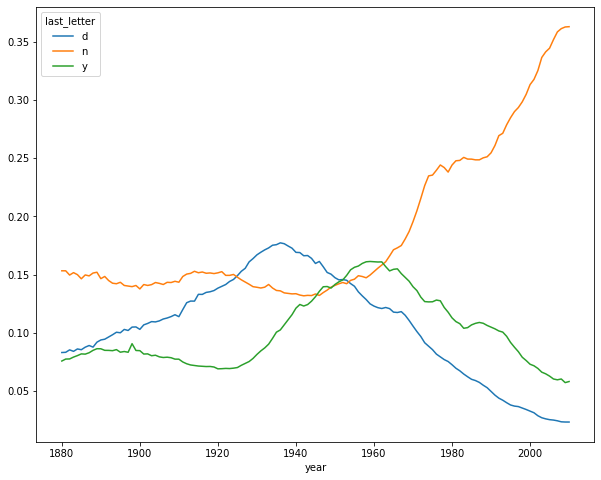

In [137]:
dny_ts.plot(figsize=(10, 8))

#### 男孩名字变成女孩名字（反之亦然）

另一个有趣的趋势是，在样本中，男孩的名字在某性别中较早流行，但在目前却具有“变性”。例如莱斯利（Lesley）或莱斯利（Leslie）。回到top1000 DataFrame，我计算数据集中出现的以“ lesl”开头的名称的列表：

In [138]:
all_names = pd.Series(top1000.name.unique())

In [139]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [140]:
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

在这里，我们可以过滤掉那些名字，然后按名字对出生进行总和，以查看相对频率：

In [142]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [143]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

接下来，让我们按性别和年份进行汇总，并在一年内进行归一化：

In [144]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [145]:
table = table.div(table.sum(1), axis=0)

In [146]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


最后，现在可以绘制按性别划分的细分图表（图14-10）：

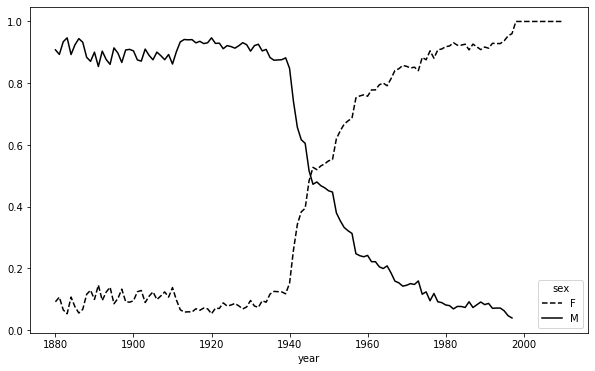

In [148]:
table.plot(style={'M': 'k-', 'F': 'k--'}, figsize=(10,6))

## 14.4 美国食品数据库

美国农业部提供了食品营养信息数据库。程序员Ashley Williams以JSON格式提供了此数据库的版本。记录如下所示：

```json
    {
        "id": 21441,
        "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing, meat and skin with breading",
        "tags": ["KFC"],
        "manufacturer": "Kentucky Fried Chicken",
        "group": "Fast Foods",
        "portions": [
            {
                "amount": 1,
                "unit": "wing, with skin",
                "grams": 68.0
            },
            ...
        ],
        "nutrients": [
            {
                "value": 20.8,
                "units": "g",
                "description": "Protein",
                "group": "Composition"
            },
        ...
        ]
    }
```

每种食物都有许多识别属性，以及营养成分和份量的两个清单。这种形式的数据不是特别适合分析，因此我们需要做一些工作将数据整理成更好的形式。

从链接下载并提取数据后，您可以使用所选的任何JSON库将其加载到Python中。我将使用内置的Python json模块：

In [149]:
import json

db = json.load(open('datasets/usda_food/database.json'))
len(db)

6636

db中的每个条目都是一个dict，包含单个食物的所有数据。“营养素”字段是字典列表，每种营养素一个：

In [150]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [151]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [152]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [153]:
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


将字典列表转换为DataFrame时，我们可以指定要提取的字段列表。我们将获取食物名称，组，ID和制造商：

In [162]:
info_keys = ['description', 'group', 'id', 'manufacturer']

In [163]:
info = pd.DataFrame(db, columns=info_keys)

In [164]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [165]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


您可以看到带有value_counts的食物组的分布：

In [166]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

现在，要对所有营养素数据进行一些分析，最简单的方法是将每种食物的营养素组合到一张表上。为此，我们需要采取几个步骤。首先，我将食物营养素的每个列表转换为一个DataFrame，为食物ID添加一列，然后将DataFrame附加到列表中。然后，可以将这些与concat串联在一起：

In [171]:
nutrients = []
for x in db:
    nutrient = pd.DataFrame(x['nutrients'])
    nutrient['id'] = x['id']
    nutrients.append(nutrient)

nutrients = pd.concat(nutrients, ignore_index=True)

如果一切顺利，营养素应如下所示：

In [172]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


我注意到此DataFrame中存在重复项，因此可以轻松删除它们：

In [174]:
nutrients.duplicated().sum()   # number of duplicates

14179

In [175]:
nutrients = nutrients.drop_duplicates()

由于'group'和'description'都在两个DataFrame对象中，为了清楚起见，我们可以重命名：

In [176]:
col_mapping = {'description': 'food',
               'group': 'fgroup'}

In [178]:
info = info.rename(columns=col_mapping, copy=False)

In [179]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [180]:
col_mapping = {'description': 'nutrient',
               'group': 'nutgroup'}

In [181]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [182]:
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


完成所有这些操作后，我们准备将信息与营养合并：

In [183]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [184]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [185]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

现在，我们可以按食物组和营养素类型绘制中间值图（见图14-11）：

In [193]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

In [210]:
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

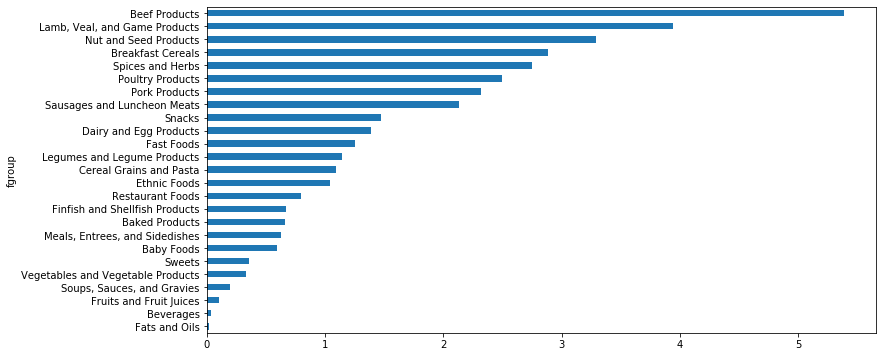

In [198]:
result['Zinc, Zn'].sort_values().plot(kind='barh', figsize=(12,6))

稍微聪明一点，您就可以发现每种营养素中哪种食物密度最高：

In [199]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

In [200]:
get_maximum = lambda x: x.loc[x.value.idxmax()]
get_minimum = lambda x: x.loc[x.value.idxmin()]

In [225]:
max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

In [226]:
max_foods.food = max_foods.food.str[:50]

结果DataFrame太大了，无法在书中显示； 这只是“氨基酸”营养素组：

In [228]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

## 14.5 2012年联邦选举委员会数据库

美国联邦选举委员会发布有关政治竞选活动的数据。 这包括供款人姓名，职业和雇主，地址和供款金额。 一个有趣的数据集来自2012年美国总统大选。 我在2012年6月下载的数据集的一个版本是一个150 MB的CSV文件P00000001-ALL.csv（请参见本书的数据存储库），该文件可以与pandas.read_csv一起加载：

In [229]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')

/Users/gaussic/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [230]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

DataFrame中的示例记录如下所示：

In [231]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

您可能会想到一些方法来对这些数据进行切片和切块，以提取有关捐赠者和竞选捐款模式的信息。我将向您展示适用于本书中技术的多种不同分析。

您可以看到数据中没有任何政党从属关系，因此添加该字段将很有用。您可以使用“唯一”获取所有唯一政治候选人的列表：

In [232]:
unique_cards = fec.cand_nm.unique()

unique_cards

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [233]:
unique_cards[2]

'Obama, Barack'

指示政党隶属关系的一种方法是使用dict：

In [234]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'
}

现在，使用此映射和Series对象上的map方法，您可以根据候选名称计算政党数组：

In [235]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [237]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [238]:
fec['party'] = fec.cand_nm.map(parties)

In [239]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

几个数据准备点。首先，此数据包括捐款和退款（负捐款金额）：

In [240]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

为了简化分析，我将数据集限制为正贡献：

In [241]:
fec = fec[fec.contb_receipt_amt > 0]

由于巴拉克·奥巴马（Barack Obama）和米特·罗姆尼（Mitt Romney）是主要的两个候选人，因此我还将准备一个对他们的竞选活动有贡献的子集：

In [242]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### 按职业和雇主的捐赠统计

职业捐款是经常研究的统计数据。例如，律师（律师）倾向于向民主党人捐款，而企业高管倾向于向共和党人捐款。你没有理由相信我。您可以在数据中看到自己。首先，按职业划分的捐赠总数很容易：

In [245]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

通过查看职业，您会发现很多职业都指的是相同的基本工作类型，或者同一事物有多种变体。以下代码段说明了一种通过从一个职业映射到另一个职业来清除其中一些的技术。注意使用dict.get允许没有映射的职业“通过”的“技巧”：

In [246]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}

# if no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

我还将为雇主做同样的事情：

In [247]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# if no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

现在，您可以使用pivot_table来按参与方和职业汇总数据，然后过滤到总共捐赠至少200万美元的子集：

In [248]:
by_occupation = fec.pivot_table('contb_receipt_amt', 
                                index='contbr_occupation', 
                                columns='party',
                                aggfunc='sum')

In [251]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [253]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


以条形图的形式更容易以图形方式查看此数据（“ barh”表示水平条形图；请参见图14-12）：

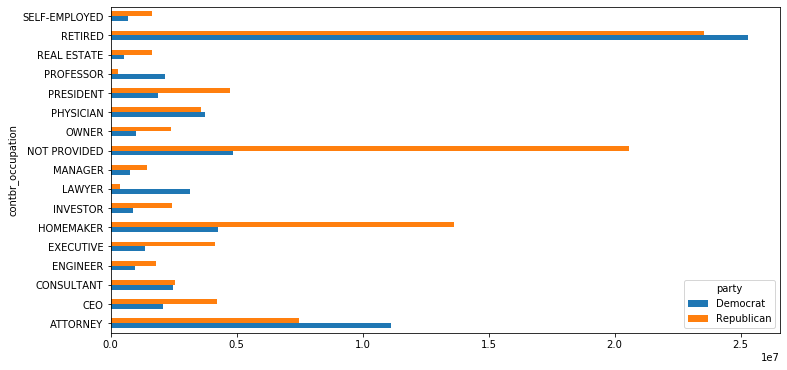

In [254]:
over_2mm.plot(kind='barh', figsize=(12,6))

您可能对捐赠给奥巴马和罗姆尼的顶尖捐助者职业或顶尖公司感兴趣。为此，您可以按候选人姓名分组，并使用本章前面的top方法的变体：

In [260]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

然后按职业和雇主进行汇总：

In [261]:
grouped = fec_mrbo.groupby('cand_nm')

In [263]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation    
Obama, Barack  RETIRED                  25305116.38
               ATTORNEY                 11141982.97
               INFORMATION REQUESTED     4866973.96
               HOMEMAKER                 4248875.80
               PHYSICIAN                 3735124.94
                                           ...     
Romney, Mitt   HOMEMAKER                 8147446.22
               ATTORNEY                  5364718.82
               PRESIDENT                 2491244.89
               EXECUTIVE                 2300947.03
               C.E.O.                    1968386.11
Name: contb_receipt_amt, Length: 14, dtype: float64

In [264]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer      
Obama, Barack  RETIRED                  22694358.85
               SELF-EMPLOYED            17080985.96
               NOT EMPLOYED              8586308.70
               INFORMATION REQUESTED     5053480.37
               HOMEMAKER                 2605408.54
                                           ...     
Romney, Mitt   CREDIT SUISSE              281150.00
               MORGAN STANLEY             267266.00
               GOLDMAN SACH & CO.         238250.00
               BARCLAYS CAPITAL           162750.00
               H.I.G. CAPITAL             139500.00
Name: contb_receipt_amt, Length: 20, dtype: float64

### 捐赠金额分桶

分析此数据的一种有用方法是使用cut函数按贡献大小将贡献者数量离散化为存储桶：

In [265]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])

In [266]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [267]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

然后，我们可以按名称和bin标签将奥巴马和罗姆尼的数据分组，以按捐赠规模获得直方图：

In [268]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [269]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


该数据表明，与罗姆尼相比，奥巴马获得的小额捐款数量要多得多。 您还可以将捐款金额相加并在存储桶中进行归一化，以按候选人显示每种规模的总捐款百分比（图14-13显示了结果图）：

In [270]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [279]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [280]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


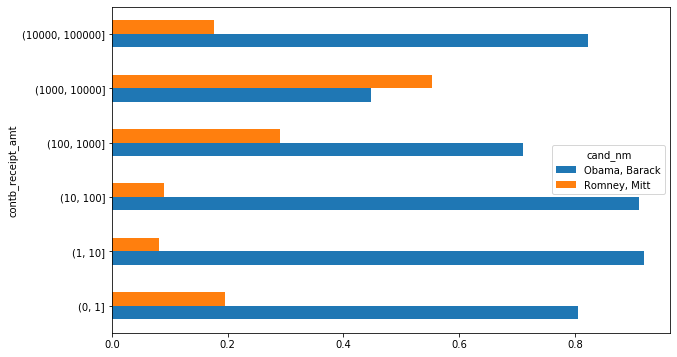

In [283]:
normed_sums[:-2].plot(kind='barh', figsize=(10,6))

我排除了两个最大的箱，因为它们不是个人捐赠的。

可以通过许多方式完善和改进此分析。例如，您可以按捐赠者姓名和邮政编码汇总捐赠，以调整捐赠数量少而捐赠数量大或少的捐赠者。我鼓励您自己下载和浏览数据集。

### 各州捐款统计

按候选人和州汇总数据是一项日常工作：

In [284]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [286]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [287]:
totals = totals[totals.sum(1) > 100000]

In [288]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


如果将每一行除以总捐款额，则可以按州获得每个候选人的总捐款的相对百分比：

In [289]:
percent = totals.div(totals.sum(1), 0)

In [290]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


## 14.6 结论

我们已经到了本书主要章节的结尾。我还提供了一些其他内容，您可能会在附录中找到有用的内容。

自本书第一版出版以来的五年中，Python已成为一种流行且广泛的数据分析语言。您在这里开发的编程技能将在未来很长一段时间内保持相关性。希望我们探索的编程工具和库在您的工作中对您有帮助。